
# Laboratorio Machine Learning: Reducción de Dimensionalidad
## PCA, t-SNE y UMAP

**Universidad de Ingeniería y Tecnología - UTEC**

---

### Integrantes del Grupo:

1. **Nombre Completo:** ___________________________________
2. **Nombre Completo:** ___________________________________
3. **Nombre Completo:** ___________________________________
4. **Nombre Completo:** ___________________________________

**Fecha:** _______________

---

## Objetivo del Laboratorio

En este laboratorio aplicarás técnicas de reducción de dimensionalidad (**PCA**, **t-SNE** y **UMAP**) a tres casos de estudio diferentes. Tu objetivo es:

1. Analizar cada dataset
2. Determinar qué técnica es más apropiada para cada caso
3. Aplicar la técnica seleccionada
4. Visualizar y analizar los resultados
5. Justificar tu elección

**Instrucciones:**
- Completa todos los apartados marcados con `# TODO:`
- Justifica tus decisiones en las celdas de markdown
- Al final, redacta conclusiones sobre lo aprendido

---

## Instalación de Librerías

Ejecuta la siguiente celda para instalar las librerías necesarias:

In [ ]:
# Instalar librerías necesarias
#!pip install numpy pandas matplotlib seaborn scikit-learn umap-learn

---

## Documentación de las Técnicas

Antes de comenzar, revisa la documentación oficial de cada técnica:

### PCA (Principal Component Analysis)
- **Documentación Scikit-learn:** https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- **Tutorial:** https://scikit-learn.org/stable/modules/decomposition.html#pca

### t-SNE (t-Distributed Stochastic Neighbor Embedding)
- **Documentación Scikit-learn:** https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
- **Tutorial:** https://scikit-learn.org/stable/modules/manifold.html#t-sne

### UMAP (Uniform Manifold Approximation and Projection)
- **Documentación UMAP:** https://umap-learn.readthedocs.io/en/latest/
- **Parámetros básicos:** https://umap-learn.readthedocs.io/en/latest/parameters.html
- **Tutorial básico:** https://umap-learn.readthedocs.io/en/latest/basic_usage.html

---

## Importar Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

/Users/fernandog/miniforge3/envs/DDstudy/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---

# CASO 1: Indicadores Socioeconómicos de Países

## Descripción del Dataset

Este dataset contiene indicadores socioeconómicos de diferentes países:
- PIB per cápita
- Esperanza de vida
- Años de escolaridad
- Tasa de mortalidad infantil
- Acceso a internet
- Entre otros indicadores

**Fuente:** Banco Mundial y Naciones Unidas

### 1.1. Cargar Dataset

In [ ]:
# Descargar dataset de indicadores socioeconómicos
import urllib.request

url = "https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv"

# Para este ejercicio, crearemos un dataset sintético basado en correlaciones lineales
# que simula indicadores socioeconómicos reales
np.random.seed(42)
n_countries = 150

# Variable base: nivel de desarrollo (latente)
desarrollo = np.random.randn(n_countries)

# Variables correlacionadas linealmente con el desarrollo
data_caso1 = pd.DataFrame({
    'PIB_per_capita': 10000 + desarrollo * 8000 + np.random.randn(n_countries) * 1500,
    'Esperanza_vida': 65 + desarrollo * 8 + np.random.randn(n_countries) * 2,
    'Escolaridad': 8 + desarrollo * 3 + np.random.randn(n_countries) * 0.8,
    'Mortalidad_infantil': 30 - desarrollo * 10 + np.random.randn(n_countries) * 3,
    'Acceso_internet': 40 + desarrollo * 25 + np.random.randn(n_countries) * 8,
    'Consumo_energia': 2000 + desarrollo * 1500 + np.random.randn(n_countries) * 400,
    'Urbanizacion': 50 + desarrollo * 20 + np.random.randn(n_countries) * 5,
    'Inflacion': 5 - desarrollo * 2 + np.random.randn(n_countries) * 1.5,
    'Desempleo': 8 - desarrollo * 3 + np.random.randn(n_countries) * 2,
    'Inversion_educacion': 3 + desarrollo * 1.5 + np.random.randn(n_countries) * 0.5
})

# Etiquetas basadas en nivel de desarrollo
labels_caso1 = pd.Series(pd.cut(desarrollo, bins=3, labels=['En Desarrollo', 'Emergente', 'Desarrollado']))

print(f"Dataset cargado: {data_caso1.shape[0]} países, {data_caso1.shape[1]} indicadores")
print("\nPrimeras filas:")
data_caso1.head()

### 1.2. Explorar el Dataset

In [ ]:
# Información básica
print("Información del dataset:")
print(data_caso1.info())

print("\nEstadísticas descriptivas:")
print(data_caso1.describe())

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(data_caso1.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Indicadores Socioeconómicos')
plt.tight_layout()
plt.show()

### 1.3. Análisis del Caso

**Preguntas para reflexionar:**

1. ¿Qué observas en la matriz de correlación?
2. ¿Las variables están linealmente correlacionadas?
3. ¿Qué tipo de estructura esperas encontrar en los datos?
4. ¿Necesitas preservar las distancias globales entre grupos de países?
5. ¿Necesitas aplicar el modelo a nuevos países en el futuro?

**Escribe tus observaciones aquí:**

*[TU RESPUESTA]*

### 1.4. Aplicar Técnica de Reducción de Dimensionalidad

**Instrucciones:**
- Elige la técnica más apropiada para este caso
- Justifica tu elección
- Implementa la técnica seleccionada

#### Justificación de la Técnica Elegida

**Técnica seleccionada:** _______________

**Justificación:**

*[EXPLICA POR QUÉ ELEGISTE ESTA TÉCNICA Y NO LAS OTRAS]*

In [ ]:
# TODO: Preprocesamiento - Estandarizar datos
scaler_caso1 = StandardScaler()
# [TU CÓDIGO AQUÍ]

# TODO: Aplicar la técnica seleccionada
# Ejemplo para PCA:
# modelo_caso1 = PCA(n_components=2, random_state=42)
# X_reducido_caso1 = modelo_caso1.fit_transform(X_scaled_caso1)

# Ejemplo para t-SNE:
# modelo_caso1 = TSNE(n_components=2, random_state=42, perplexity=30)
# X_reducido_caso1 = modelo_caso1.fit_transform(X_scaled_caso1)

# Ejemplo para UMAP:
# modelo_caso1 = umap.UMAP(n_components=2, random_state=42)
# X_reducido_caso1 = modelo_caso1.fit_transform(X_scaled_caso1)

# [TU CÓDIGO AQUÍ]

### 1.5. Visualizar Resultados

In [ ]:
# TODO: Visualizar los resultados

# Plantilla de código:
# plt.figure(figsize=(12, 8))
# scatter = plt.scatter(X_reducido_caso1[:, 0], X_reducido_caso1[:, 1],
#                      c=labels_caso1.codes, cmap='viridis', alpha=0.6, s=100)
# plt.colorbar(scatter, label='Nivel de Desarrollo')
# plt.xlabel('Componente 1')
# plt.ylabel('Componente 2')
# plt.title('Caso 1: Reducción de Dimensionalidad de Indicadores Socioeconómicos')
# plt.grid(True, alpha=0.3)
# plt.show()

# [TU CÓDIGO AQUÍ]

### 1.6. Análisis de Resultados - Caso 1

**Preguntas:**

1. ¿Se pueden distinguir grupos de países claramente?
2. ¿Tiene sentido la separación que observas?
3. ¿Qué porcentaje de varianza se explicó? (si aplica)
4. ¿Los resultados coinciden con tu hipótesis inicial?

**Respuestas:**

*[TU ANÁLISIS AQUÍ]*

---

# CASO 2: Clasificación de Imágenes (Fashion-MNIST)

## Descripción del Dataset

Fashion-MNIST es un dataset de imágenes de ropa y accesorios:
- 70,000 imágenes en escala de grises de 28×28 pixels
- 10 categorías: camiseta, pantalón, jersey, vestido, abrigo, sandalia, camisa, zapatilla, bolso, botín
- Cada imagen tiene 784 dimensiones (28×28)

**Fuente:** Zalando Research

### 2.1. Cargar Dataset

In [ ]:
# Descargar Fashion-MNIST desde sklearn
from sklearn.datasets import fetch_openml

print("Descargando Fashion-MNIST (puede tomar unos minutos)...")
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, parser='auto')

# Tomar un subset para velocidad (5000 imágenes)
np.random.seed(42)
indices_caso2 = np.random.choice(len(fashion_mnist.data), size=5000, replace=False)

data_caso2 = fashion_mnist.data.iloc[indices_caso2].values
labels_caso2 = fashion_mnist.target.iloc[indices_caso2].astype(int)

# Nombres de las clases
class_names = ['Camiseta', 'Pantalón', 'Jersey', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín']

print(f"\nDataset cargado: {data_caso2.shape[0]} imágenes, {data_caso2.shape[1]} dimensiones")
print(f"Clases: {np.unique(labels_caso2)}")

### 2.2. Explorar el Dataset

In [ ]:
# Visualizar algunas imágenes de ejemplo
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(data_caso2[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'{class_names[labels_caso2.iloc[i]]}')
    ax.axis('off')
plt.suptitle('Ejemplos de Imágenes de Fashion-MNIST', fontsize=16)
plt.tight_layout()
plt.show()

# Distribución de clases
plt.figure(figsize=(10, 5))
unique, counts = np.unique(labels_caso2, return_counts=True)
plt.bar([class_names[i] for i in unique], counts)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Distribución de Clases en el Subset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.3. Análisis del Caso

**Preguntas para reflexionar:**

1. ¿Cuántas dimensiones tiene cada imagen originalmente?
2. ¿Las relaciones entre imágenes son lineales o no lineales?
3. ¿Qué es más importante: ver clusters bien separados o preservar distancias globales?
4. ¿El dataset es grande o pequeño?
5. ¿Necesitas aplicar el modelo a nuevas imágenes?

**Escribe tus observaciones aquí:**

*[TU RESPUESTA]*

### 2.4. Aplicar Técnica de Reducción de Dimensionalidad

**Instrucciones:**
- Elige la técnica más apropiada para este caso
- Justifica tu elección
- Implementa la técnica seleccionada

#### Justificación de la Técnica Elegida

**Técnica seleccionada:** _______________

**Justificación:**

*[EXPLICA POR QUÉ ELEGISTE ESTA TÉCNICA Y NO LAS OTRAS]*

In [ ]:
# TODO: Preprocesamiento - Estandarizar datos
scaler_caso2 = StandardScaler()
# [TU CÓDIGO AQUÍ]

# TODO: Aplicar la técnica seleccionada
# [TU CÓDIGO AQUÍ]

# Nota: Para t-SNE con muchos datos, puede tomar varios minutos
# Considera usar n_iter=1000 y verificar la convergencia

### 2.5. Visualizar Resultados

In [ ]:
# TODO: Visualizar los resultados
# Tip: Usa diferentes colores para cada clase de ropa

# [TU CÓDIGO AQUÍ]

### 2.6. Análisis de Resultados - Caso 2

**Preguntas:**

1. ¿Se pueden distinguir las 10 clases de ropa claramente?
2. ¿Qué clases están más cerca entre sí? ¿Tiene sentido?
3. ¿Hay clases que se mezclan? ¿Por qué?
4. ¿La visualización ayuda a entender la estructura de los datos?

**Respuestas:**

*[TU ANÁLISIS AQUÍ]*

---

# CASO 3: Análisis de Expresión Genética (Single-Cell)

## Descripción del Dataset

Este dataset simula datos de expresión genética de células individuales (single-cell RNA-seq):
- Múltiples células de diferentes tipos celulares
- Cada célula tiene expresión de cientos de genes
- Estructura jerárquica: Tipos celulares → Subtipos celulares
- Dataset grande con múltiples escalas de variación

**Nota:** Usaremos datos sintéticos que simulan características reales de datos biológicos

### 3.1. Cargar Dataset

In [2]:
# Crear dataset sintético que simula single-cell RNA-seq
np.random.seed(42)

n_cells = 3000  # Número de células
n_genes = 200   # Número de genes

# Crear 3 tipos celulares principales, cada uno con 3 subtipos
cells_per_subtype = n_cells // 9

data_list = []
type_labels = []
subtype_labels = []

for tipo in range(3):
    for subtipo in range(3):
        # Centros jerárquicos: tipo principal + variación de subtipo
        center_tipo = np.random.randn(n_genes) * 3
        center_subtipo = center_tipo + np.random.randn(n_genes) * 0.5

        # Generar células con estructura no lineal
        cells = center_subtipo + np.random.randn(cells_per_subtype, n_genes) * 0.3

        # Añadir relaciones no lineales
        for i in range(n_genes // 4):
            cells[:, i] = np.abs(cells[:, i])  # Activación

        data_list.append(cells)
        type_labels.extend([f'Tipo_{tipo+1}'] * cells_per_subtype)
        subtype_labels.extend([f'T{tipo+1}_S{subtipo+1}'] * cells_per_subtype)

data_caso3 = np.vstack(data_list)
type_labels_caso3 = np.array(type_labels)
subtype_labels_caso3 = np.array(subtype_labels)

# Convertir a DataFrame
gene_names = [f'Gene_{i+1}' for i in range(n_genes)]
data_caso3_df = pd.DataFrame(data_caso3, columns=gene_names)

print(f"Dataset cargado: {data_caso3.shape[0]} células, {data_caso3.shape[1]} genes")
print(f"\nTipos celulares: {np.unique(type_labels_caso3)}")
print(f"Subtipos celulares: {np.unique(subtype_labels_caso3)}")
print("\nPrimeras células:")
data_caso3_df.head()

Dataset cargado: 2997 células, 200 genes

Tipos celulares: ['Tipo_1' 'Tipo_2' 'Tipo_3']
Subtipos celulares: ['T1_S1' 'T1_S2' 'T1_S3' 'T2_S1' 'T2_S2' 'T2_S3' 'T3_S1' 'T3_S2' 'T3_S3']

Primeras células:


,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,Gene_10,...,Gene_191,Gene_192,Gene_193,Gene_194,Gene_195,Gene_196,Gene_197,Gene_198,Gene_199,Gene_200
0,1.190708,0.314213,2.486164,5.110085,1.526314,0.984468,4.674870,2.516483,1.114811,3.708378,...,-1.767282,2.671859,0.125859,-2.721388,1.420525,0.768359,-3.589102,0.844482,-0.015932,-2.696813
1,1.896133,0.411050,2.745473,5.502682,1.267264,0.608285,4.763019,2.185801,1.684515,4.002859,...,-1.659867,2.877462,0.063638,-3.204512,0.784946,1.237310,-3.520006,1.342562,0.125852,-2.801076
2,1.950521,0.289214,2.513427,4.957308,1.521644,1.264075,5.061796,2.415573,0.774172,3.285664,...,-1.726237,2.202636,-0.091989,-3.026082,0.808777,0.837034,-2.968834,1.330364,-0.053997,-2.638228
3,2.088843,0.142989,2.502480,4.901910,1.181828,1.053278,5.263714,2.749749,0.836034,3.393475,...,-1.757140,2.414948,-0.198246,-2.725552,0.631365,1.053507,-3.514031,1.303858,0.184530,-2.400761
4,1.706603,0.263222,2.521280,5.258980,1.376637,1.159146,4.784559,2.360327,1.571681,4.078919,...,-1.650761,2.611841,0.586181,-2.780526,0.999666,0.976768,-3.912277,0.846627,0.477480,-3.007071


### 3.2. Explorar el Dataset

Estadísticas del dataset:
            Gene_1       Gene_2       Gene_3       Gene_4       Gene_5  \
count  2997.000000  2997.000000  2997.000000  2997.000000  2997.000000   
mean      2.238640     3.051946     3.376106     2.508512     2.260062   
std       2.262195     3.486476     1.433811     1.878765     1.322099   
min       0.001936     0.000914     0.003328     0.004600     0.003304   
25%       0.695299     0.544552     2.420437     1.024270     1.258291   
50%       1.584048     1.216942     3.422537     1.828809     2.204412   
75%       2.410427     4.914179     4.167065     4.583292     3.106543   
max       8.674588    11.625968     6.805485     6.299671     5.875227   

            Gene_6       Gene_7       Gene_8       Gene_9      Gene_10  ...  \
count  2997.000000  2997.000000  2997.000000  2997.000000  2997.000000  ...   
mean      2.336542     2.415550     2.868446     2.447071     2.824390  ...   
std       2.047549     1.516162     1.047022     1.741664     1.661087

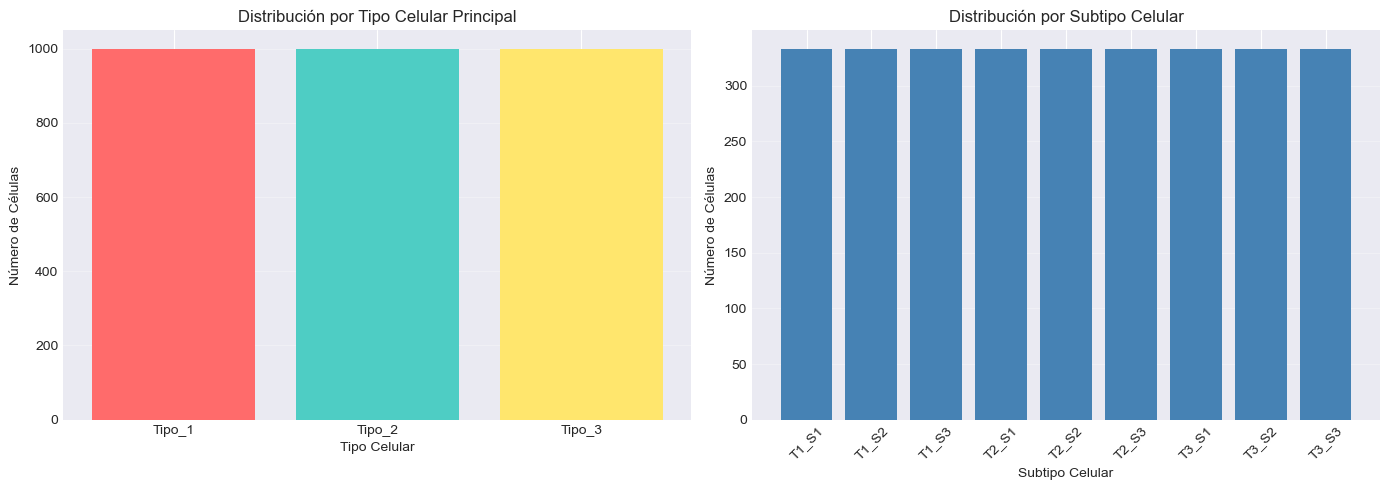

In [3]:
# Estadísticas básicas
print("Estadísticas del dataset:")
print(data_caso3_df.describe())

# Distribución de tipos celulares
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tipos principales
unique_types, counts_types = np.unique(type_labels_caso3, return_counts=True)
axes[0].bar(unique_types, counts_types, color=['#FF6B6B', '#4ECDC4', '#FFE66D'])
axes[0].set_xlabel('Tipo Celular')
axes[0].set_ylabel('Número de Células')
axes[0].set_title('Distribución por Tipo Celular Principal')
axes[0].grid(True, alpha=0.3, axis='y')

# Subtipos
unique_subtypes, counts_subtypes = np.unique(subtype_labels_caso3, return_counts=True)
axes[1].bar(range(len(unique_subtypes)), counts_subtypes, color='steelblue')
axes[1].set_xlabel('Subtipo Celular')
axes[1].set_ylabel('Número de Células')
axes[1].set_title('Distribución por Subtipo Celular')
axes[1].set_xticks(range(len(unique_subtypes)))
axes[1].set_xticklabels(unique_subtypes, rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 3.3. Análisis del Caso

**Preguntas para reflexionar:**

1. ¿Cuántas células y genes tiene el dataset?
2. ¿Existe estructura jerárquica en los datos (tipos → subtipos)?
3. ¿Es importante preservar tanto la separación entre tipos como entre subtipos?
4. ¿El tamaño del dataset es grande?
5. ¿Necesitas velocidad de procesamiento?
6. ¿Las relaciones son lineales o no lineales?

**Escribe tus observaciones aquí:**

1. Tiene 2997 células y 200 genes.
2. Si, existen 3 tipos de células, y cada tipo tiene 3 subtipos.
3. Si lo es porque la separación entre tipos muestra diferencias biológicas grandes mientras que la separación de subtipos permite ver variaciones finas dentro de cada tipo.
4. 'Grande' es relativo, aunque no tiene muchas filas (solo 2997), la dimensionalidad es muy alta, asi que 2997*200 =599400 registros en total, se podría decir que si es grande.
5. Debido al tamaño del dataset, un método eficiente en velocidad de procesamiento seria buena opción.
6. Se puede ver que el dataset fue simulado con relaciones no lineales

### 3.4. Aplicar Técnica de Reducción de Dimensionalidad

**Instrucciones:**
- Elige la técnica más apropiada para este caso
- Justifica tu elección
- Implementa la técnica seleccionada

#### Justificación de la Técnica Elegida

**Técnica seleccionada:** UMAP

**Justificación:**

Dado al tamaño moderadamente grande del dataset, se puede eliminar técnicas iterativas como el t-SNE. Además, se require preservar relaciones globales y locales y no se necesitan nuevos datos. Por otro lado, se observa que las relaciones no son lineales, así que la técnica superior seria UMAP.

In [9]:
# TODO: Preprocesamiento - Estandarizar datos
scaler_caso3 = StandardScaler()
# [TU CÓDIGO AQUÍ]
scaled_data = scaler_caso3.fit_transform(data_caso3_df)
df_scaled = pd.DataFrame(scaled_data, columns=gene_names)


# TODO: Aplicar la técnica seleccionada
# Tip: Si usas UMAP, considera n_neighbors entre 15-30
# [TU CÓDIGO AQUÍ]
embedding = umap.UMAP(n_components=2, n_neighbors=20, random_state=42).fit_transform(df_scaled)


### 3.5. Visualizar Resultados

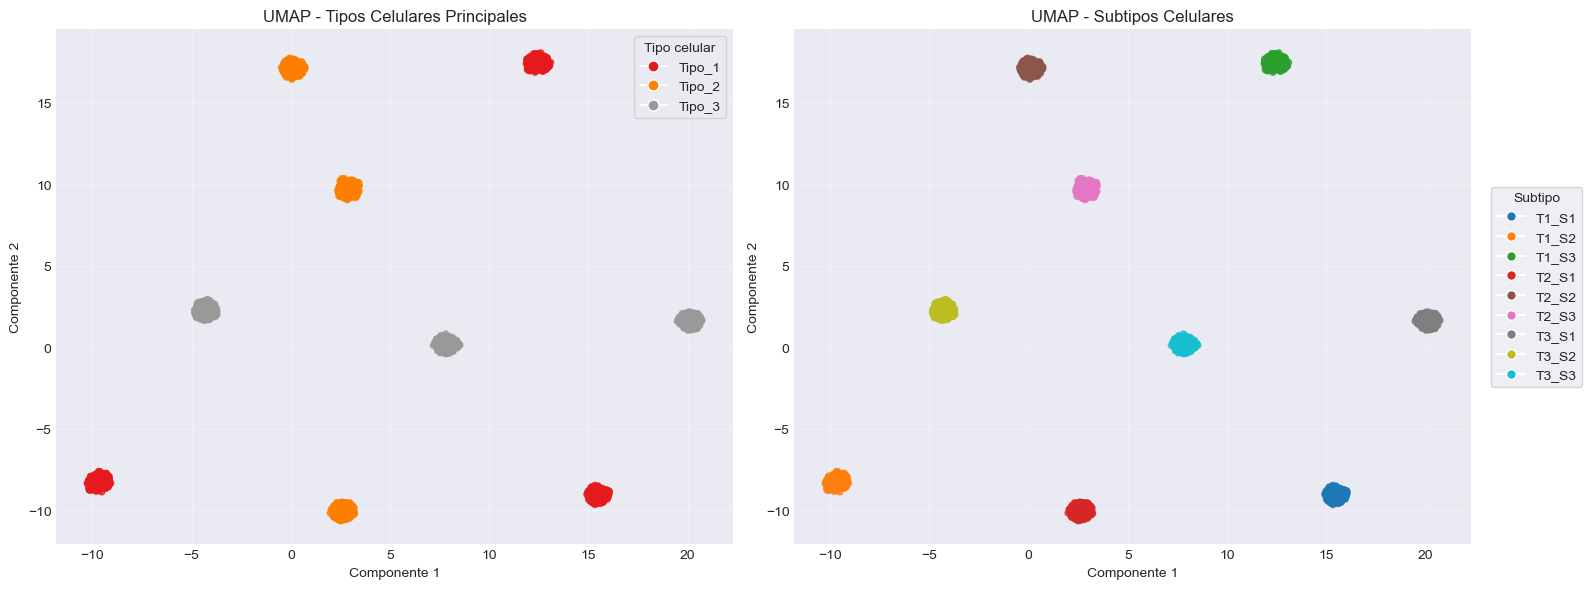

In [11]:
# TODO: Visualizar los resultados
# Crear dos gráficos: uno por tipos principales y otro por subtipos

# [TU CÓDIGO AQUÍ]
# Codificar etiquetas una sola vez (más consistente)
from matplotlib.lines import Line2D

# Codificar etiquetas
type_codes, type_uniques = pd.factorize(type_labels_caso3)
subtype_codes, subtype_uniques = pd.factorize(subtype_labels_caso3)

# Colores discretos
type_cmap = plt.cm.get_cmap("Set1", len(type_uniques))
subtype_cmap = plt.cm.get_cmap("tab10", len(subtype_uniques))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: tipos principales
axes[0].scatter(
    embedding[:, 0], embedding[:, 1],
    c=type_codes, cmap=type_cmap, alpha=0.75, s=18
)
axes[0].set_xlabel("Componente 1")
axes[0].set_ylabel("Componente 2")
axes[0].set_title("UMAP - Tipos Celulares Principales")
axes[0].grid(True, alpha=0.3)

type_handles = [
    Line2D([0], [0], marker='o', color='w', label=lbl,
           markerfacecolor=type_cmap(i), markersize=8)
    for i, lbl in enumerate(type_uniques)
]
axes[0].legend(handles=type_handles, title="Tipo celular", loc="best", frameon=True)

# Gráfico 2: subtipos
axes[1].scatter(
    embedding[:, 0], embedding[:, 1],
    c=subtype_codes, cmap=subtype_cmap, alpha=0.75, s=18
)
axes[1].set_xlabel("Componente 1")
axes[1].set_ylabel("Componente 2")
axes[1].set_title("UMAP - Subtipos Celulares")
axes[1].grid(True, alpha=0.3)

subtype_handles = [
    Line2D([0], [0], marker='o', color='w', label=lbl,
           markerfacecolor=subtype_cmap(i), markersize=7)
    for i, lbl in enumerate(subtype_uniques)
]
axes[1].legend(
    handles=subtype_handles, title="Subtipo",
    loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=True
)

plt.tight_layout()
plt.show()

### 3.6. Análisis de Resultados - Caso 3

**Preguntas:**

1. ¿Se pueden distinguir los 3 tipos celulares principales?
2. ¿Se pueden ver los subtipos dentro de cada tipo?
3. ¿Se preserva la estructura jerárquica?
4. ¿Los tipos celulares mantienen sus distancias relativas?
5. ¿Qué ventajas ofrece la técnica elegida para este tipo de datos?

**Respuestas:**

1. Si se observan los 3 tipos celulares.
2. Si, se observan los 3 subtipos celulares.
3. Dado que se pueden observar los tupos y los subtipos, si se preserva la estructura jerárquica.
4. Parcialmente sí, las distancias locales se preservan mejor que las relaciones globales.
5. Captura relaciones no lineales, preserva relaciones globales y locales. Escala bien a datos con alta dimensionalidad y es más rápido que t-SNE.

---

# Comparación de Resultados

## Resumen de Técnicas Utilizadas

Completa la siguiente tabla con las técnicas que elegiste para cada caso:

| Caso | Dataset | Técnica Elegida | Razón Principal |
|------|---------|-----------------|------------------|
| 1 | Indicadores Socioeconómicos | ___________ | ___________ |
| 2 | Fashion-MNIST | ___________ | ___________ |
| 3 | Expresión Genética | ___________ | ___________ |

## Reflexión sobre las Diferencias

**Responde:**

1. ¿Por qué una técnica funciona mejor que otra según el tipo de datos?

*[TU RESPUESTA]*

2. ¿Qué características del dataset te ayudaron a decidir qué técnica usar?

*[TU RESPUESTA]*

3. ¿En qué casos sería útil combinar técnicas (ej: PCA → t-SNE)?

*[TU RESPUESTA]*

---

# Conclusiones Finales

## Aprendizajes del Laboratorio

Escribe tus conclusiones sobre lo aprendido en este laboratorio:

### 1. Sobre PCA:

*[TUS CONCLUSIONES SOBRE PCA]*

### 2. Sobre t-SNE:

*[TUS CONCLUSIONES SOBRE t-SNE]*

### 3. Sobre UMAP:

*[TUS CONCLUSIONES SOBRE UMAP]*

### 4. Comparación General:

*[TUS CONCLUSIONES COMPARATIVAS]*

### 5. Aplicaciones Prácticas:

*[CÓMO APLICARÍAS LO APRENDIDO EN PROYECTOS REALES]*

---

## Referencias

- Scikit-learn Documentation: https://scikit-learn.org/
- UMAP Documentation: https://umap-learn.readthedocs.io/
- Fashion-MNIST: https://github.com/zalandoresearch/fashion-mnist

---
